In [2]:
import pandas as pd
df=pd.read_csv('Clean_Dataset.csv')
df.head()

,title,text,labels,label_names
0,law enforcement on high alert following threat...,No comment is expected from Barack Obama Membe...,1,real
1,unbelievable obama’s attorney general says mos...,"Now, most of the demonstrators gathered last ...",1,real
2,bobby jindal raised hindu uses story of christ...,A dozen politically active pastors came here f...,0,fake
3,satan russia unvelis an image of its terrifyin...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,real
4,about time christian group sues amazon and spl...,All we can say on this one is it s about time ...,1,real


In [3]:
# Get the dependent and independent features
x=df.drop('labels',axis=1)
y = df['labels']

In [4]:
x.shape

(63121, 3)

In [5]:
import tensorflow as tf
tf.__version__

'2.20.0'

In [6]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [7]:
voc_size=5000 # Vocabulary size

### Onehot Representation

In [8]:
messages=x.copy()
messages['title'][1]

'unbelievable obama’s attorney general says most charlotte rioters were “peaceful” protesters…in her home state of north carolina video'

In [9]:
import nltk
import re
from nltk.corpus import stopwords

In [10]:
# Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

# convert all titles to string
messages['title'] = messages['title'].astype(str)

corpus = []

for i in range(len(messages)):
    review = messages['title'][i]

    # remove anything not a letter
    review = re.sub('[^a-zA-Z]', ' ', review)

    review = review.lower()
    review = review.split()

    # stem + remove stopwords
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]

    review = ' '.join(review)
    corpus.append(review)

In [11]:
corpus

['law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video',
 'unbeliev obama attorney gener say charlott rioter peac protest home state north carolina video',
 'bobbi jindal rais hindu use stori christian convers woo evangel potenti bid',
 'satan russia unv imag terrifi new supernuk western world take notic',
 'time christian group sue amazon splc design hate group',
 'dr ben carson target ir never audit spoke nation prayer breakfast',
 'hous intel chair trumprussia fake stori evid anyth video',
 'sport bar owner ban nfl game show true american sport like speak rural america video',
 'latest pipelin leak underscor danger dakota access pipelin',
 'gop senat smack punchabl altright nazi internet',
 'may brexit offer would hurt cost eu citizen eu parliament',
 'schumer call trump appoint offici overse puerto rico relief',
 'watch hilari ad call question health age clinton crime famili boss',
 'chang expect espn polit agenda despit huge subscrib declin breitbart',


In [12]:
onehot_repr = [one_hot(words, voc_size) for words in corpus]
onehot_repr

[[1408, 1674, 3318, 3495, 4946, 1379, 3568, 1579, 1042, 552, 3405, 1387],
 [171,
  2556,
  1521,
  3498,
  1891,
  4235,
  1463,
  4748,
  4713,
  371,
  4455,
  2806,
  3276,
  1387],
 [3299, 1474, 3671, 658, 3261, 3226, 3999, 4306, 3588, 1968, 1430, 3921],
 [3597, 3742, 3010, 2717, 2097, 3510, 3007, 2087, 952, 3489, 3352],
 [3368, 3999, 562, 178, 2253, 4339, 3687, 2140, 562],
 [4558, 1010, 418, 4270, 4796, 606, 3674, 3665, 76, 3160, 3264],
 [1402, 1144, 3980, 3180, 3938, 3226, 4513, 2469, 1387],
 [257,
  2993,
  4093,
  4184,
  1543,
  3251,
  2915,
  4549,
  2041,
  257,
  3118,
  1494,
  1945,
  4386,
  1387],
 [1740, 1006, 1525, 1231, 3655, 400, 3674, 1006],
 [490, 2580, 4144, 297, 4904, 769, 4074],
 [2528, 1869, 2608, 798, 379, 3280, 3806, 1334, 3806, 702],
 [2762, 3483, 2228, 3694, 4586, 327, 326, 4374, 2652],
 [1195, 2907, 4925, 3483, 2330, 3056, 4762, 3416, 2790, 4924, 3909],
 [4269, 2070, 583, 4918, 1369, 2864, 1373, 4875, 4293, 4466],
 [4823, 235, 1224, 510, 3332, 1402, 1755

In [13]:
print(corpus[1])
print(onehot_repr[1])

unbeliev obama attorney gener say charlott rioter peac protest home state north carolina video
[171, 2556, 1521, 3498, 1891, 4235, 1463, 4748, 4713, 371, 4455, 2806, 3276, 1387]


### Embedding Representation

In [14]:
sentence_length = 20
embedded_docs = pad_sequences(onehot_repr, padding='post', maxlen=sentence_length)
print(embedded_docs)

[[1408 1674 3318 ...    0    0    0]
 [ 171 2556 1521 ...    0    0    0]
 [3299 1474 3671 ...    0    0    0]
 ...
 [1195 1838 2356 ...    0    0    0]
 [2193 3098   46 ...    0    0    0]
 [2228 4408 4567 ...    0    0    0]]


In [15]:
embedded_docs[0]

array([1408, 1674, 3318, 3495, 4946, 1379, 3568, 1579, 1042,  552, 3405,
       1387,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

### Creating the model

In [16]:
embedding_vector_features = 40

model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_shape=(sentence_length,)))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.summary()


c:\Users\Amreet\Desktop\Fake_News_Detection\FakeNews\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 20, 40)         │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │        86,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286,657 (1.09 MB)

 Trainable params: 286,657 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
import numpy as np

# Converting the list into arrays using numpy
x_final = np.array(embedded_docs)
y_final = np.array(y)

# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.33, random_state=42)

In [18]:
# Model training
model.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['Accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64)

Epoch 1/20
661/661 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - Accuracy: 0.8418 - loss: 0.3473 - val_Accuracy: 0.8768 - val_loss: 0.2856
Epoch 2/20
661/661 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - Accuracy: 0.8963 - loss: 0.2489 - val_Accuracy: 0.8773 - val_loss: 0.2799
Epoch 3/20
661/661 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - Accuracy: 0.9080 - loss: 0.2232 - val_Accuracy: 0.8738 - val_loss: 0.2948
Epoch 4/20
661/661 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - Accuracy: 0.9185 - loss: 0.2032 - val_Accuracy: 0.8794 - val_loss: 0.2948
Epoch 5/20
661/661 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - Accuracy: 0.9263 - loss: 0.1860 - val_Accuracy: 0.8739 - val_loss: 0.3062
Epoch 6/20
661/661 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - Accuracy: 0.9335 - loss: 0.1665 - val_Accuracy: 0.8740 - val_loss: 0.3182
Epoch 7/20
661/661 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - Accuracy: 0.9419 - loss: 0.1436 - val_Accuracy: 0.8723 - val_loss: 0.3429
Epoch 8/20
661/661 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - Accuracy: 0.9514 - loss: 0.1219 - val_Ac

In [19]:
y_pred = model.predict(x_test)
y_pred = np.where(y_pred>0.5, 1, 0)

651/651 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from matplotlib import pyplot as plt

# class_names = sorted(df['label_names'].unique()) 
# print(class_names)

print(f"Accuracy : {accuracy_score(y_test, y_pred)}")
print(f"Classification report : {classification_report(y_test, y_pred)}")

Accuracy : 0.8644263082093135
Classification report :               precision    recall  f1-score   support

           0       0.87      0.89      0.88     11412
           1       0.86      0.84      0.85      9418

    accuracy                           0.86     20830
   macro avg       0.86      0.86      0.86     20830
weighted avg       0.86      0.86      0.86     20830



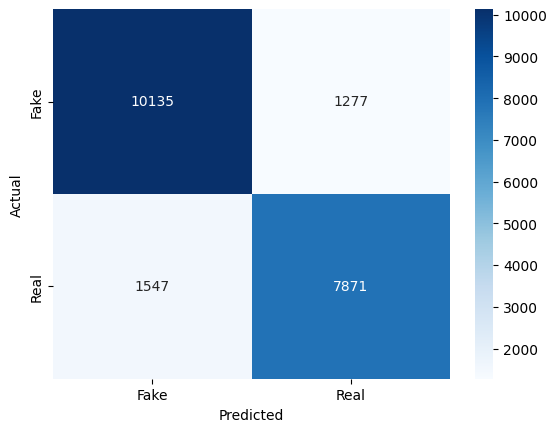

In [21]:
cm = confusion_matrix(y_test, y_pred)
class_names = ['Fake','Real']
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()